In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd


HLY = pd.read_excel('../DataSets/Healthy Life Years.xlsx', sheet_name='Sheet 1',  skiprows = 9,  nrows= 34, usecols = 'A:AI')
print(HLY)

                                                TIME  2011  Unnamed: 2  2012  \
0                                       GEO (Labels)   NaN         NaN   NaN   
1          European Union - 27 countries (from 2020)  61.4         NaN  61.3   
2          European Union - 28 countries (2013-2020)  61.8         NaN  61.7   
3                                            Belgium  63.5         NaN  64.6   
4                                           Bulgaria  64.0         NaN  63.9   
5                                            Czechia  62.9         NaN  63.2   
6                                            Denmark  61.8         NaN  61.4   
7   Germany (until 1990 former territory of the FRG)  58.2         NaN  57.6   
8                                            Estonia  56.1         NaN  55.1   
9                                            Ireland  67.2         NaN  67.2   
10                                            Greece  66.6         NaN  64.9   
11                                      

C:\Users\Diogo\AppData\Local\Temp\ipykernel_32920\797510045.py:8: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  HLY = pd.read_excel('../DataSets/Healthy Life Years.xlsx', sheet_name='Sheet 1',  skiprows = 9,  nrows= 34, usecols = 'A:AI')


In [5]:
HLY = HLY.dropna(axis=1, thresh=15) 


In [6]:
HLY = HLY.tail(-1)
HLY

,TIME,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,European Union - 27 countries (from 2020),61.4,61.3,61,61.3,62.8,64.0,63.9,64.0,64.6,64
2,European Union - 28 countries (2013-2020),61.8,61.7,61.4,61.5,62.9,63.8,63.7,63.6,:,:
3,Belgium,63.5,64.6,63.9,64.1,64.2,63.7,63.7,63.4,62.4,63.8
4,Bulgaria,64.0,63.9,64.5,64.0,63.2,65.7,64.5,65.8,66.3,65.6
5,Czechia,62.9,63.2,63.3,64.1,63.0,63.3,61.4,62.7,62,61.6
6,Denmark,61.8,61.4,60.5,60.9,59.1,60.3,59.7,60.9,58.9,58
7,Germany (until 1990 former territory of the FRG),58.2,57.6,57.4,56.5,66.4,66.4,66.0,65.8,66.3,65.7
8,Estonia,56.1,55.1,55.5,55.2,55.0,56.8,56.0,53.9,55.8,57.6
9,Ireland,67.2,67.2,66.9,66.9,67.2,68.5,68.6,69.4,69.6,66.2
10,Greece,66.6,64.9,64.9,64.5,64.0,64.3,64.8,65.4,66,65.9


In [7]:
HLY.replace(to_replace = ':', value = 0, inplace = True)
HLY

,TIME,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,European Union - 27 countries (from 2020),61.4,61.3,61.0,61.3,62.8,64.0,63.9,64.0,64.6,64.0
2,European Union - 28 countries (2013-2020),61.8,61.7,61.4,61.5,62.9,63.8,63.7,63.6,0.0,0.0
3,Belgium,63.5,64.6,63.9,64.1,64.2,63.7,63.7,63.4,62.4,63.8
4,Bulgaria,64.0,63.9,64.5,64.0,63.2,65.7,64.5,65.8,66.3,65.6
5,Czechia,62.9,63.2,63.3,64.1,63.0,63.3,61.4,62.7,62.0,61.6
6,Denmark,61.8,61.4,60.5,60.9,59.1,60.3,59.7,60.9,58.9,58.0
7,Germany (until 1990 former territory of the FRG),58.2,57.6,57.4,56.5,66.4,66.4,66.0,65.8,66.3,65.7
8,Estonia,56.1,55.1,55.5,55.2,55.0,56.8,56.0,53.9,55.8,57.6
9,Ireland,67.2,67.2,66.9,66.9,67.2,68.5,68.6,69.4,69.6,66.2
10,Greece,66.6,64.9,64.9,64.5,64.0,64.3,64.8,65.4,66.0,65.9


In [8]:
HLY.rename(columns = {'TIME':'Countries'}, inplace = True)


In [9]:
B = HLY.iloc[: , :-2].copy()
B = B.iloc[: , 1:].copy()
B[B == 0] = np.nan
H = B.mean().round(1)
Z = B.append(H, ignore_index=True)
mean = (sum(Z.iloc[-1])/15)
mean = round(mean,1)
mean

C:\Users\Diogo\AppData\Local\Temp\ipykernel_32920\59967140.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Z = B.append(H, ignore_index=True)


33.2

In [10]:
Column1 = HLY[["Countries"]]
Column1_ = Column1.append({'Countries': 'Mean from 2004 to 2018'}, ignore_index=True)
HLY = HLY[["2019"]]
HLY = HLY.append(pd.Series([mean], index=HLY.columns), ignore_index=True)
HLY_ = Column1_.join(HLY)
HLY_

C:\Users\Diogo\AppData\Local\Temp\ipykernel_32920\1580405185.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Column1_ = Column1.append({'Countries': 'Mean from 2004 to 2018'}, ignore_index=True)
C:\Users\Diogo\AppData\Local\Temp\ipykernel_32920\1580405185.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  HLY = HLY.append(pd.Series([mean], index=HLY.columns), ignore_index=True)


,Countries,2019
0,European Union - 27 countries (from 2020),64.6
1,European Union - 28 countries (2013-2020),0.0
2,Belgium,62.4
3,Bulgaria,66.3
4,Czechia,62.0
5,Denmark,58.9
6,Germany (until 1990 former territory of the FRG),66.3
7,Estonia,55.8
8,Ireland,69.6
9,Greece,66.0


In [11]:
HLY_ = HLY_[ HLY_["Countries"].str.contains("European")==False ]
HLY_ = HLY_[HLY_["Countries"].str.contains("United Kingdom") == False]
HLY_ = HLY_[HLY_["Countries"].str.contains("Iceland") == False]
HLY_['Countries'].replace('Germany (until 1990 former territory of the FRG)','Germany',inplace=True)
HLY_

,Countries,2019
2,Belgium,62.4
3,Bulgaria,66.3
4,Czechia,62.0
5,Denmark,58.9
6,Germany,66.3
7,Estonia,55.8
8,Ireland,69.6
9,Greece,66.0
10,Spain,69.9
11,France,64.1


In [12]:
HLY_.dtypes

Countries     object
2019         float64
dtype: object

In [13]:
# HLY = HLY[(HLY != 0).all(1)]
# HLY

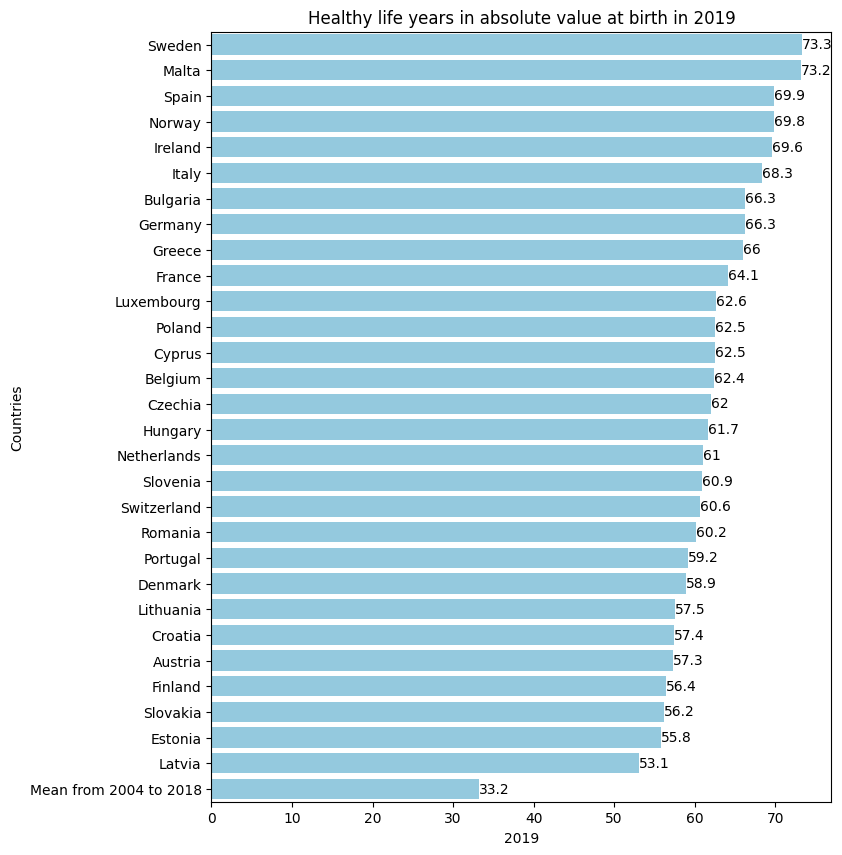

In [14]:
tmp = HLY_.copy()
tmp.sort_values(by="2019", ascending=False, inplace=True)

plt.figure(figsize = (8, 10))
ax = sns.barplot(data=tmp, x="2019", y="Countries", color="skyblue")
ax.bar_label(ax.containers[0])
plt.title(f"Healthy life years in absolute value at birth in 2019")
plt.show()

C:\Users\Diogo\AppData\Local\Temp\ipykernel_32920\1604273439.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(europe_map.centroid.x, europe_map.centroid.y, europe_map['Countries']):


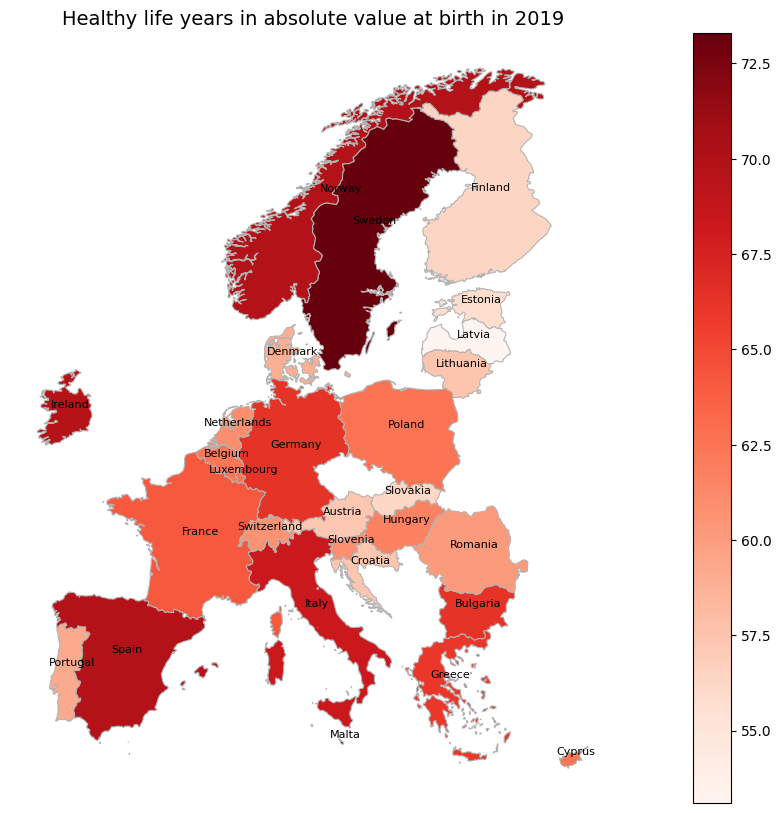

In [15]:
geo = pd.DataFrame()
geo= HLY_
geo.columns

europe = gpd.read_file('../DataSets/europe.geojson')[['NAME', 'geometry']]

europe_countries= list(europe.NAME.values)
my_countries = list(geo.Countries.values)
countries_unformated = set(my_countries)-set(europe_countries)

europe_map = europe.merge(geo, left_on='NAME', right_on='Countries', how='left')

fig, ax = plt.subplots(1, figsize=(20, 10))
graph = europe_map.plot(column='2019', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.7', legend = True)
ax.axis('off')
for x, y, label in zip(europe_map.centroid.x, europe_map.centroid.y, europe_map['Countries']):
    if not pd.isnull(label):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center')
graph.set_title('Healthy life years in absolute value at birth in 2019', fontsize=14)
plt.show()